In [0]:
import Python

In [0]:
let 👍: Int = 123

In [3]:
👍

123


In [4]:
Double.pi

3.141592653589793


In [5]:
Float.pi

3.1415925


# Iris Dataset play
https://www.tensorflow.org/swift/tutorials/model_training_walkthrough

In [0]:
import TensorFlow

import Python
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")
let plt = Python.import("matplotlib.pyplot")

In [0]:
// Download a helper file that helps us work around some temporary limitations
// in the dataset API.
import Foundation
import FoundationNetworking
func download(from sourceString: String, to destinationString: String) {
    let source = URL(string: sourceString)!
    let destination = URL(fileURLWithPath: destinationString)
    let data = try! Data.init(contentsOf: source)
    try! data.write(to: destination)
}
download(
    from: "https://raw.githubusercontent.com/tensorflow/swift/master/docs/site/tutorials/TutorialDatasetCSVAPI.swift",
    to: "TutorialDatasetCSVAPI.swift")

In [0]:
let trainDataFilename = "iris_training.csv"
download(from: "http://download.tensorflow.org/data/iris_training.csv", to: trainDataFilename)

In [9]:
print(Python.version)

3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]


In [10]:
let f = Python.open(trainDataFilename)
for _ in 0..<5 {
    print(Python.next(f).strip())
}
f.close()

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


None


In [11]:
let pd = Python.import("pandas")
pd

<module 'pandas' from '/usr/local/lib/python3.6/dist-packages/pandas/__init__.py'>


In [12]:
pd.set_option("display.max_columns", 100)


None


In [13]:
let df = pd.read_csv(trainDataFilename)
df.head(20)

    120    4  setosa  versicolor  virginica
0   6.4  2.8     5.6         2.2          2
1   5.0  2.3     3.3         1.0          1
2   4.9  2.5     4.5         1.7          2
3   4.9  3.1     1.5         0.1          0
4   5.7  3.8     1.7         0.3          0
5   4.4  3.2     1.3         0.2          0
6   5.4  3.4     1.5         0.4          0
7   6.9  3.1     5.1         2.3          2
8   6.7  3.1     4.4         1.4          1
9   5.1  3.7     1.5         0.4          0
10  5.2  2.7     3.9         1.4          1
11  6.9  3.1     4.9         1.5          1
12  5.8  4.0     1.2         0.2          0
13  5.4  3.9     1.7         0.4          0
14  7.7  3.8     6.7         2.2          2
15  6.3  3.3     4.7         1.6          1
16  6.8  3.2     5.9         2.3          2
17  7.6  3.0     6.6         2.1          2
18  6.4  3.2     5.3         2.3          2
19  5.7  4.4     1.5         0.4          0


In [14]:
var integer: Int = 20
var decimal: Double = 8.5

integer = Int(decimal)
integer

8


In [15]:
let featureNames = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
let labelName = "species"
let columnNames = featureNames + [labelName]

print("Features: \(featureNames)")
print("Label: \(labelName)")

Features: ["sepal_length", "sepal_width", "petal_length", "petal_width"]
Label: species


In [0]:
let classNames = ["Iris setosa", "Iris versicolor", "Iris virginica"]

In [0]:
let batchSize = 32

/// A batch of examples from the iris dataset.
struct IrisBatch {
    /// [batchSize, featureCount] tensor of features.
    let features: Tensor<Float>

    /// [batchSize] tensor of labels.
    let labels: Tensor<Int32>
}

%include "TutorialDatasetCSVAPI.swift"

let trainDataset: Dataset<IrisBatch> = Dataset(
    contentsOfCSVFile: trainDataFilename, hasHeader: true,
    featureColumns: [0, 1, 2, 3], labelColumns: [4]
).batched(batchSize)

In [0]:
let firstTrainExamples = trainDataset.first!
let firstTrainFeatures = firstTrainExamples.features
let firstTrainLabels = firstTrainExamples.labels

In [19]:
trainDataset.first

▿ Optional<IrisBatch>
  ▿ some : IrisBatch
    - features : [[6.4, 2.8, 5.6, 2.2],
 [5.0, 2.3, 3.3, 1.0],
 [4.9, 2.5, 4.5, 1.7],
 [4.9, 3.1, 1.5, 0.1],
 [5.7, 3.8, 1.7, 0.3],
 [4.4, 3.2, 1.3, 0.2],
 [5.4, 3.4, 1.5, 0.4],
 [6.9, 3.1, 5.1, 2.3],
 [6.7, 3.1, 4.4, 1.4],
 [5.1, 3.7, 1.5, 0.4],
 [5.2, 2.7, 3.9, 1.4],
 [6.9, 3.1, 4.9, 1.5],
 [5.8, 4.0, 1.2, 0.2],
 [5.4, 3.9, 1.7, 0.4],
 [7.7, 3.8, 6.7, 2.2],
 [6.3, 3.3, 4.7, 1.6],
 [6.8, 3.2, 5.9, 2.3],
 [7.6, 3.0, 6.6, 2.1],
 [6.4, 3.2, 5.3, 2.3],
 [5.7, 4.4, 1.5, 0.4],
 [6.7, 3.3, 5.7, 2.1],
 [6.4, 2.8, 5.6, 2.1],
 [5.4, 3.9, 1.3, 0.4],
 [6.1, 2.6, 5.6, 1.4],
 [7.2, 3.0, 5.8, 1.6],
 [5.2, 3.5, 1.5, 0.2],
 [5.8, 2.6, 4.0, 1.2],
 [5.9, 3.0, 5.1, 1.8],
 [5.4, 3.0, 4.5, 1.5],
 [6.7, 3.0, 5.0, 1.7],
 [6.3, 2.3, 4.4, 1.3],
 [5.1, 2.5, 3.0, 1.1]]
    - labels : [2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1]


In [20]:
trainDataset.first!.features

[[6.4, 2.8, 5.6, 2.2],
 [5.0, 2.3, 3.3, 1.0],
 [4.9, 2.5, 4.5, 1.7],
 [4.9, 3.1, 1.5, 0.1],
 [5.7, 3.8, 1.7, 0.3],
 [4.4, 3.2, 1.3, 0.2],
 [5.4, 3.4, 1.5, 0.4],
 [6.9, 3.1, 5.1, 2.3],
 [6.7, 3.1, 4.4, 1.4],
 [5.1, 3.7, 1.5, 0.4],
 [5.2, 2.7, 3.9, 1.4],
 [6.9, 3.1, 4.9, 1.5],
 [5.8, 4.0, 1.2, 0.2],
 [5.4, 3.9, 1.7, 0.4],
 [7.7, 3.8, 6.7, 2.2],
 [6.3, 3.3, 4.7, 1.6],
 [6.8, 3.2, 5.9, 2.3],
 [7.6, 3.0, 6.6, 2.1],
 [6.4, 3.2, 5.3, 2.3],
 [5.7, 4.4, 1.5, 0.4],
 [6.7, 3.3, 5.7, 2.1],
 [6.4, 2.8, 5.6, 2.1],
 [5.4, 3.9, 1.3, 0.4],
 [6.1, 2.6, 5.6, 1.4],
 [7.2, 3.0, 5.8, 1.6],
 [5.2, 3.5, 1.5, 0.2],
 [5.8, 2.6, 4.0, 1.2],
 [5.9, 3.0, 5.1, 1.8],
 [5.4, 3.0, 4.5, 1.5],
 [6.7, 3.0, 5.0, 1.7],
 [6.3, 2.3, 4.4, 1.3],
 [5.1, 2.5, 3.0, 1.1]]


In [21]:
trainDataset.first!.labels

[2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1]


In [22]:
firstTrainFeatures.transposed()

[[6.4, 5.0, 4.9, 4.9, 5.7, 4.4, 5.4, 6.9, 6.7, 5.1, 5.2, 6.9, 5.8, 5.4, 7.7, 6.3, 6.8, 7.6, 6.4, 5.7, 6.7, 6.4, 5.4, 6.1, 7.2, 5.2,
  5.8, 5.9, 5.4, 6.7, 6.3, 5.1],
 [2.8, 2.3, 2.5, 3.1, 3.8, 3.2, 3.4, 3.1, 3.1, 3.7, 2.7, 3.1, 4.0, 3.9, 3.8, 3.3, 3.2, 3.0, 3.2, 4.4, 3.3, 2.8, 3.9, 2.6, 3.0, 3.5,
  2.6, 3.0, 3.0, 3.0, 2.3, 2.5],
 [5.6, 3.3, 4.5, 1.5, 1.7, 1.3, 1.5, 5.1, 4.4, 1.5, 3.9, 4.9, 1.2, 1.7, 6.7, 4.7, 5.9, 6.6, 5.3, 1.5, 5.7, 5.6, 1.3, 5.6, 5.8, 1.5,
  4.0, 5.1, 4.5, 5.0, 4.4, 3.0],
 [2.2, 1.0, 1.7, 0.1, 0.3, 0.2, 0.4, 2.3, 1.4, 0.4, 1.4, 1.5, 0.2, 0.4, 2.2, 1.6, 2.3, 2.1, 2.3, 0.4, 2.1, 2.1, 0.4, 1.4, 1.6, 0.2,
  1.2, 1.8, 1.5, 1.7, 1.3, 1.1]]


In [23]:
firstTrainFeatures.transposed()[2].scalars

▿ 32 elements
  - 0 : 5.6
  - 1 : 3.3
  - 2 : 4.5
  - 3 : 1.5
  - 4 : 1.7
  - 5 : 1.3
  - 6 : 1.5
  - 7 : 5.1
  - 8 : 4.4
  - 9 : 1.5
  - 10 : 3.9
  - 11 : 4.9
  - 12 : 1.2
  - 13 : 1.7
  - 14 : 6.7
  - 15 : 4.7
  - 16 : 5.9
  - 17 : 6.6
  - 18 : 5.3
  - 19 : 1.5
  - 20 : 5.7
  - 21 : 5.6
  - 22 : 1.3
  - 23 : 5.6
  - 24 : 5.8
  - 25 : 1.5
  - 26 : 4.0
  - 27 : 5.1
  - 28 : 4.5
  - 29 : 5.0
  - 30 : 4.4
  - 31 : 3.0


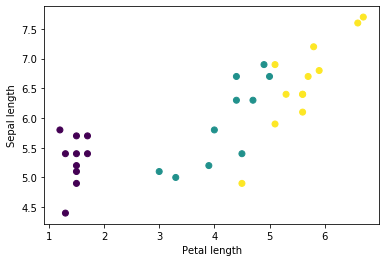

None


In [24]:
let firstTrainFeaturesTransposed = firstTrainFeatures.transposed()
let petalLengths = firstTrainFeaturesTransposed[2].scalars
let sepalLengths = firstTrainFeaturesTransposed[0].scalars

plt.scatter(petalLengths, sepalLengths, c: firstTrainLabels.array.scalars)
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [0]:
import TensorFlow

let hiddenSize: Int = 10
struct IrisModel: Layer {
    var layer1 = Dense<Float>(inputSize: 4, outputSize: hiddenSize, activation: relu)
    var layer2 = Dense<Float>(inputSize: hiddenSize, outputSize: hiddenSize, activation: relu)
    var layer3 = Dense<Float>(inputSize: hiddenSize, outputSize: 3)
    
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return input.sequenced(through: layer1, layer2, layer3)
    }
}

var model = IrisModel()

In [26]:
let firstTrainPredictions = model(firstTrainFeatures)
firstTrainPredictions[0..<5]

[[ 0.9016478,  0.8907674, -2.9506414],
 [ 0.5592571,  0.5546799, -2.0853481],
 [0.57447845,  0.7889459, -2.2977972],
 [0.49123922,  0.2002473, -1.3781539],
 [0.63411796,  0.2225758, -1.6187265]]


In [28]:
softmax(firstTrainPredictions[0..<5])

[[ 0.49741107,  0.49202836, 0.010560574],
 [ 0.48391783,  0.48170787, 0.034374326],
 [ 0.43558335,  0.53977567, 0.024640972],
 [  0.5258345,  0.39307272,  0.08109274],
 [  0.5656981,  0.37484714, 0.059454788]]


In [29]:
print("Prediction: \(firstTrainPredictions.argmax(squeezingAxis: 1))")
print("    Labels: \(firstTrainLabels)")

Prediction: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]
    Labels: [2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1]


In [30]:
let untrainedLogits = model(firstTrainFeatures)
let untrainedLoss = softmaxCrossEntropy(logits: untrainedLogits, labels: firstTrainLabels)
print("Loss test: \(untrainedLoss)")

Loss test: 2.1055155


In [0]:
let optimizer = SGD(for: model, learningRate: 0.01)

In [32]:
let (loss, grads) = model.valueWithGradient { model -> Tensor<Float> in
    let logits = model(firstTrainFeatures)
    return softmaxCrossEntropy(logits: logits, labels: firstTrainLabels)
}
print("Current loss: \(loss)")

Current loss: 2.1055155


In [0]:
optimizer.update(&model.allDifferentiableVariables, along: grads)

In [39]:
let logitsAfterOneStep = model(firstTrainFeatures)
let lossAfterOneStep = softmaxCrossEntropy(logits: logitsAfterOneStep, labels: firstTrainLabels)
print("Next loss: \(lossAfterOneStep)")

Next loss: 1.2867589


In [0]:
let epochCount = 500
var trainAccuracyResults: [Float] = []
var trainLossResults: [Float] = []

In [41]:
func accuracy(predictions: Tensor<Int32>, truths: Tensor<Int32>) -> Float {
    return Tensor<Float>(predictions .== truths).mean().scalarized()
}

for epoch in 1...epochCount {
    var epochLoss: Float = 0
    var epochAccuracy: Float = 0
    var batchCount: Int = 0
    for batch in trainDataset {
        let (loss, grad) = model.valueWithGradient { (model: IrisModel) -> Tensor<Float> in
            let logits = model(batch.features)
            return softmaxCrossEntropy(logits: logits, labels: batch.labels)
        }
        optimizer.update(&model.allDifferentiableVariables, along: grad)
        
        let logits = model(batch.features)
        epochAccuracy += accuracy(predictions: logits.argmax(squeezingAxis: 1), truths: batch.labels)
        epochLoss += loss.scalarized()
        batchCount += 1
    }
    epochAccuracy /= Float(batchCount)
    epochLoss /= Float(batchCount)
    trainAccuracyResults.append(epochAccuracy)
    trainLossResults.append(epochLoss)
    if epoch % 50 == 0 {
        print("Epoch \(epoch): Loss: \(epochLoss), Accuracy: \(epochAccuracy)")
    }
}

Epoch 50: Loss: 0.34320694, Accuracy: 0.9401042
Epoch 100: Loss: 0.24411628, Accuracy: 0.9557292
Epoch 150: Loss: 0.19819017, Accuracy: 0.9557292
Epoch 200: Loss: 0.17036112, Accuracy: 0.9557292
Epoch 250: Loss: 0.15016097, Accuracy: 0.9557292
Epoch 300: Loss: 0.13476387, Accuracy: 0.9557292
Epoch 350: Loss: 0.1234553, Accuracy: 0.9557292
Epoch 400: Loss: 0.11427217, Accuracy: 0.9557292
Epoch 450: Loss: 0.10703916, Accuracy: 0.9739583
Epoch 500: Loss: 0.10107569, Accuracy: 0.9739583


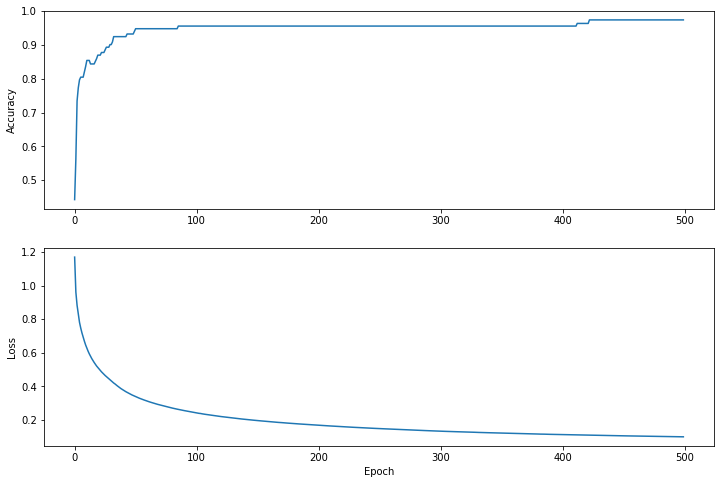

None


In [42]:
plt.figure(figsize: [12, 8])

let accuracyAxes = plt.subplot(2, 1, 1)
accuracyAxes.set_ylabel("Accuracy")
accuracyAxes.plot(trainAccuracyResults)

let lossAxes = plt.subplot(2, 1, 2)
lossAxes.set_ylabel("Loss")
lossAxes.set_xlabel("Epoch")
lossAxes.plot(trainLossResults)

plt.show()

# End Iris dataset play